In [26]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [27]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [53]:
from sklearn import datasets

X, Y, coef = datasets.make_regression(n_samples=100000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, bias=0, coef=True, random_state=2)
display(X, Y, coef)

array([[-1.04834194, -0.66009134],
       [-0.61611776, -0.6492181 ],
       [-1.08748347,  0.48279052],
       ...,
       [ 0.26093994, -0.64597382],
       [-0.74618483,  0.33134868],
       [-0.2872111 ,  0.11534105]])

array([-125.32313353,  -88.38541744,  -80.82992461, ...,   -6.36902037,
        -58.67362515,  -22.43636317])

array([96.98894865, 52.52522903])

In [54]:
def calc_mse(Y, Y_pred):
    err = np.mean((Y - Y_pred)**2)
    return err

In [55]:
X = standard_scale(X)

In [56]:
# Gradient descent (GD)
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [57]:
# Stochastic gradient descent (SGD)
def stohastic_gradient_descent(X, Y, iterations, eta=1e-4, size=1):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[ind], W)
        W = W - eta * 2 / Y[ind].shape[0] * np.dot(X[ind].T, y_pred - Y[ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

In [58]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent(X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 12228.614867567594
Iter: 500, error 1653.0328275241243
Iter: 1000, error 242.15655589809154
Iter: 1500, error 53.922516364434024
Iter: 2000, error 28.807550723583553
Iter: 2500, error 25.45640872493103
Iter: 3000, error 25.00923165611326
Iter: 3500, error 24.94955653366143
Iter: 4000, error 24.941592467251446
Iter: 4500, error 24.94052953677454
Final MSE: 24.94038766239859
CPU times: user 10.9 s, sys: 82.2 ms, total: 11 s
Wall time: 5.65 s


In [59]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(X, Y, iterations=5000, eta=1e-3, size=1)

Iter: 0, error 11981.11711495881
Iter: 500, error 1657.7548820254865
Iter: 1000, error 275.0565723442098
Iter: 1500, error 60.73176428272022
Iter: 2000, error 30.102018419738897
Iter: 2500, error 25.60471716092755
Iter: 3000, error 25.148094322403207
Iter: 3500, error 25.115614563319927
Iter: 4000, error 25.009232127245316
Iter: 4500, error 25.042072250629584
Final MSE: 24.95738943940413
CPU times: user 2.87 s, sys: 25.5 ms, total: 2.9 s
Wall time: 1.47 s


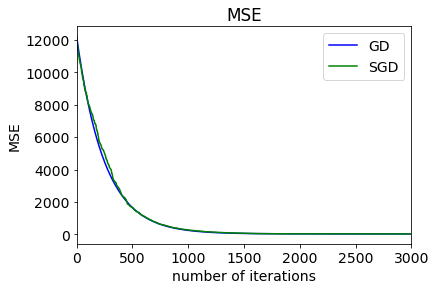

In [65]:
# Changing of MSE with GD and SGD 
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('number of iterations')
plt.ylabel('MSE')
plt.xlim(0, 3000)
plt.legend();

In [70]:
def gradient_descent_reg_l1(X, Y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        Y_pred = np.dot(X, W)
        err = calc_mse(Y, Y_pred)
        
        dQ = 2/n * X.T @ (Y_pred - Y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W

In [71]:
gradient_descent_reg_l1(X, Y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 2.8075197  -0.25214757], error 12205.663211167757
Iter: 500, weights: [96.86579519 52.42411802], error 24.940490671133837
Iter: 1000, weights: [96.86950537 52.42600118], error 24.940415451733024
Iter: 1500, weights: [96.86950552 52.42600125], error 24.940415449557044
Iter: 2000, weights: [96.86950552 52.42600125], error 24.940415449556966
Iter: 2500, weights: [96.86950552 52.42600125], error 24.940415449556966
Iter: 3000, weights: [96.86950552 52.42600125], error 24.940415449556966
Iter: 3500, weights: [96.86950552 52.42600125], error 24.940415449556966
Iter: 4000, weights: [96.86950552 52.42600125], error 24.940415449556966
Iter: 4500, weights: [96.86950552 52.42600125], error 24.940415449556966
Final MSE: 24.940415449556966


array([96.86950552, 52.42600125])

In [75]:
%%time
gradient_descent_reg_l1(X, Y, iterations=5000, eta=1e-3)

Iter: 0, weights: [ 0.92251105 -0.27436816], error 12131.037295912744
Iter: 500, weights: [61.74981763 33.31496875], error 1640.2619368147714
Iter: 1000, weights: [84.01609193 45.49853094], error 240.48653889216874
Iter: 1500, weights: [92.16711923 49.91722853], error 53.70435005467406
Iter: 2000, weights: [95.15107987 51.51958818], error 28.779087167409536
Iter: 2500, weights: [96.24350054 52.10057994], error 25.45270279495764
Iter: 3000, weights: [96.64344798 52.31121113], error 25.00875111095814
Iter: 3500, weights: [96.78987872 52.38756244], error 24.949494824761256
Iter: 4000, weights: [96.8434927  52.41523503], error 24.94158474807749
Iter: 4500, weights: [96.86312361 52.42526319], error 24.940528644854357
Final MSE: 24.94038758699992
CPU times: user 11 s, sys: 103 ms, total: 11.1 s
Wall time: 5.69 s


array([96.87030344, 52.42889252])

In [84]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]]).T  # возраст репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [85]:
# веса по МНК
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([ 5.31431473e+01,  5.13381190e+00,  6.37461212e-03, -5.44708363e-01])

In [86]:
X_1 = [1, 1, 1000, 20]
X_2 = [1, 1, 1000, 21]

X_2 @ w - X_1 @ w

-0.5447083634816536

In [87]:
X_st = X.copy().astype(np.float64)

X_st[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_st[:, 1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [88]:
X_st[:, 1].mean(), X_st[:, 1].std()

(3.3306690738754695e-17, 1.0)

In [89]:
X.mean(axis=0)

array([  1. ,   2.6, 975. ,  28.1])

In [90]:
def standardization(x: np.ndarray) -> np.ndarray:
    '''Функция принимает и возвращает одномерный массив'''
    s = (x - x.mean(axis=0)) / x.std()
    return s

In [91]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err



In [97]:
def eval_model_reg2(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

In [102]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        w -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {w}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, w))}')
    return w

In [106]:
w = eval_model_reg2(X, y, iterations=1000, eta=1e-3, lambda_=0.001, verbose=True)

100: weights=[nan nan nan nan], MSE=nan
200: weights=[nan nan nan nan], MSE=nan
300: weights=[nan nan nan nan], MSE=nan
400: weights=[nan nan nan nan], MSE=nan
500: weights=[nan nan nan nan], MSE=nan
600: weights=[nan nan nan nan], MSE=nan
700: weights=[nan nan nan nan], MSE=nan
800: weights=[nan nan nan nan], MSE=nan
900: weights=[nan nan nan nan], MSE=nan
1000: weights=[nan nan nan nan], MSE=nan


<ipython-input-91-108e594cb81f>:2: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2)
